# Question 3: Clustering
**1.1 K-means clustering**

**<font color='teal'>a)</font>** Perform K-means clustering on the formulae from the heat capacity problem (HW2, Question 2). See if you can see trends in clusters when you change the numbers of clusters (turning on data point labels with formula will help)

Processing Input Data: 100%|██████████| 4553/4553 [00:00<00:00, 45558.18it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4553/4553 [00:00<00:00, 27699.21it/s]


	Creating Pandas Objects...


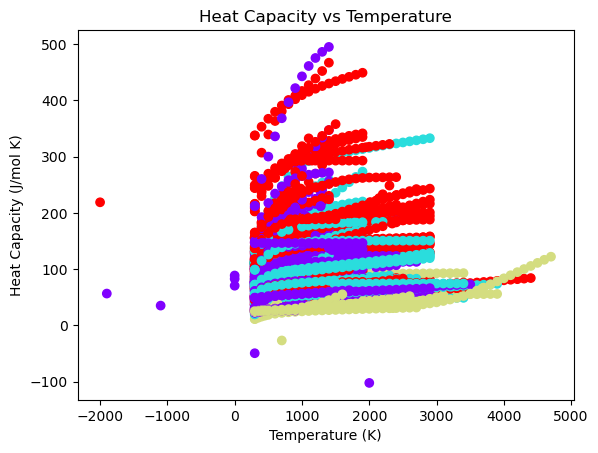

In [120]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CBFV import composition
# import the modules to standaradize and normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Load the data
data = pd.read_csv('cp_data_demo.csv')
data = data.drop_duplicates()
data = data.dropna()
data.rename(columns={'PROPERTY: Heat Capacity (J/mol K)': 'target'}, inplace=True)
data.rename(columns={'CONDITION: Temperature (K)': 'temperature'}, inplace=True)
data.rename(columns={'FORMULA': 'formula'}, inplace=True)
X, y, formula, skipped = composition.generate_features(data, elem_prop='oliynyk', extend_features=True)
# Create the KMeans model
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model
kmeans.fit(X)

labels = kmeans.labels_

# plot the data as a scatter plot
plt.scatter(data['temperature'], data['target'], c=labels, cmap='rainbow')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/mol K)')
plt.title('Heat Capacity vs Temperature')
plt.show()





**1.2 t-sne clustering vs umap**

**<font color='teal'>b)</font>** Now compare t-sne and umap embeddings. Explore the parameters a bit. 

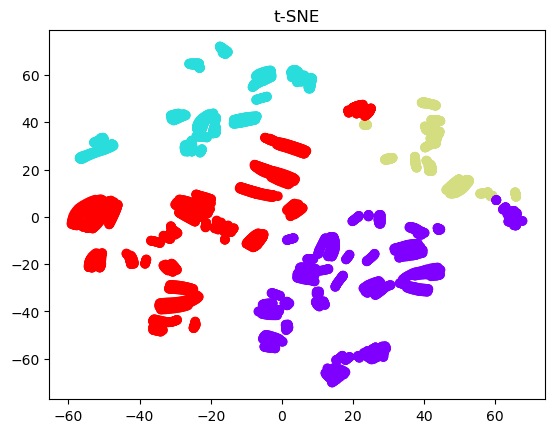

In [121]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(X)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='rainbow')
plt.title('t-SNE')
plt.show()



<Axes: >

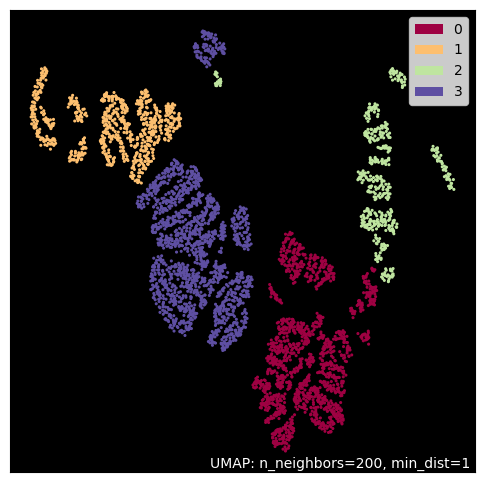

In [122]:
# import umap and use to to cluster plot the data
import umap
import umap.plot

# umap.plot.points(X_umap, labels=labels, width=600, height=600)
X_umap = umap.UMAP(n_neighbors=200, min_dist=1, n_components=2).fit(X)
umap.plot.points(X_umap, labels=labels, width=600, height=600, background='black')
